In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Tel_data = pd.read_csv('Telecom_Churn.csv')

In [3]:
Tel_data.drop(['Unnamed: 20','Unnamed: 21','Unnamed: 22'],axis = 1,inplace = True)

In [4]:
Tel_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [5]:
Tel_data.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [142]:
Tel_data['Churn'].value_counts(normalize = True)

Churn
0    0.857571
1    0.142429
Name: proportion, dtype: float64

In [7]:
num=[]
cat=[]
for i in Tel_data.drop('Churn',axis=1,inplace = False).columns:
    if Tel_data[i].dtype != 'object':
        num.append(i)
    else:
        cat.append(i)

In [8]:
num

['Account length',
 'Area code',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls']

In [9]:
cat

['State', 'International plan', 'Voice mail plan']

In [10]:
Tel_data.duplicated().sum()

0

In [11]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [12]:
for col in num:
    lr,ur = remove_outlier(Tel_data[col])
    Tel_data[col] = np.where(Tel_data[col]>ur,ur,Tel_data[col])
    Tel_data[col] = np.where(Tel_data[col]<lr,lr,Tel_data[col])

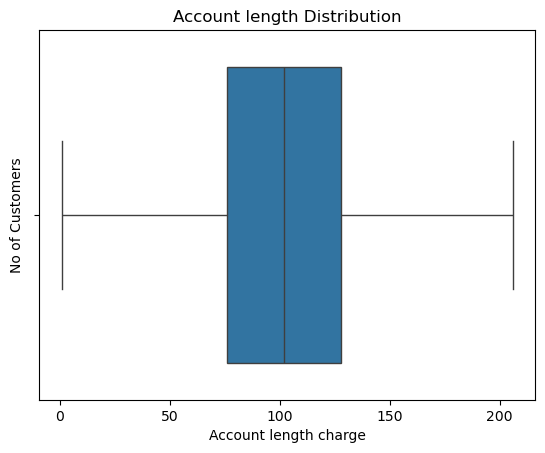

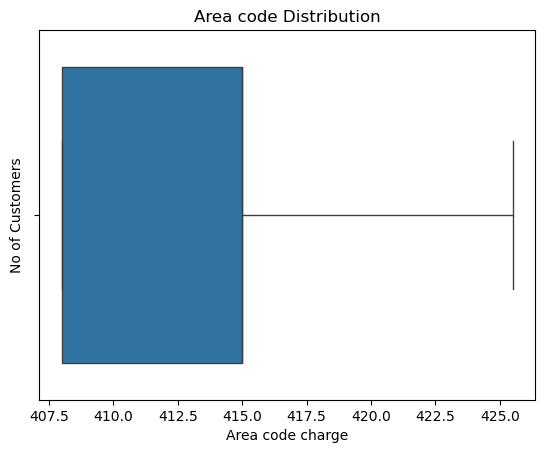

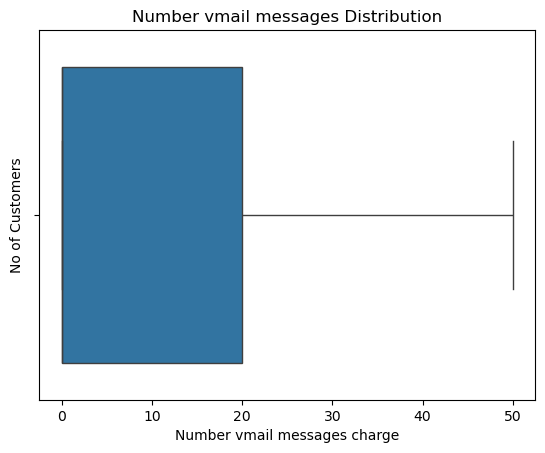

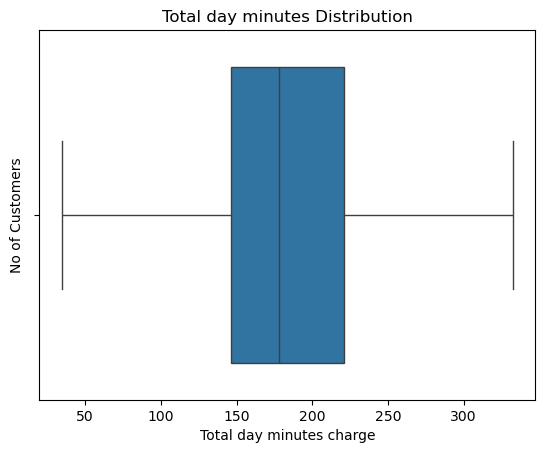

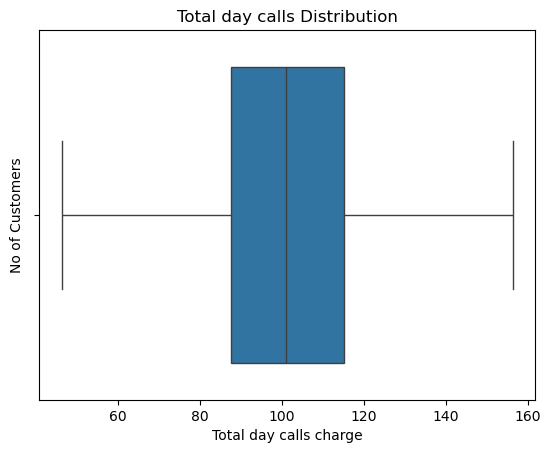

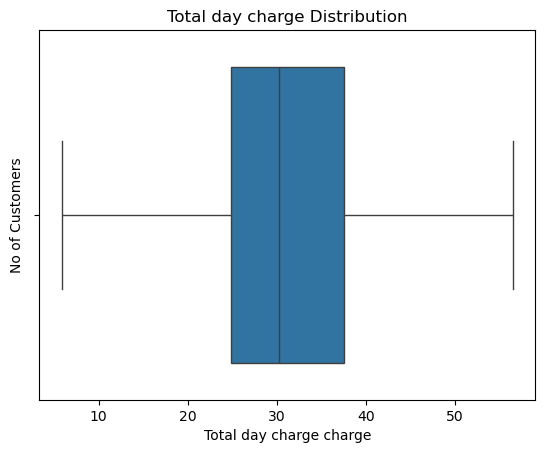

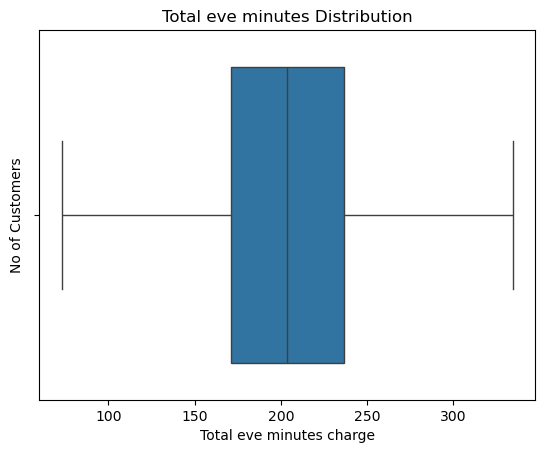

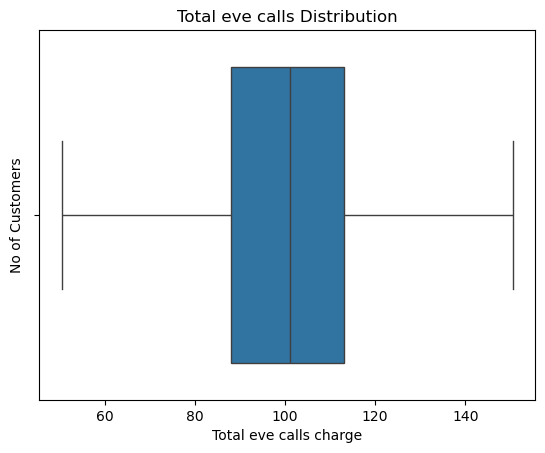

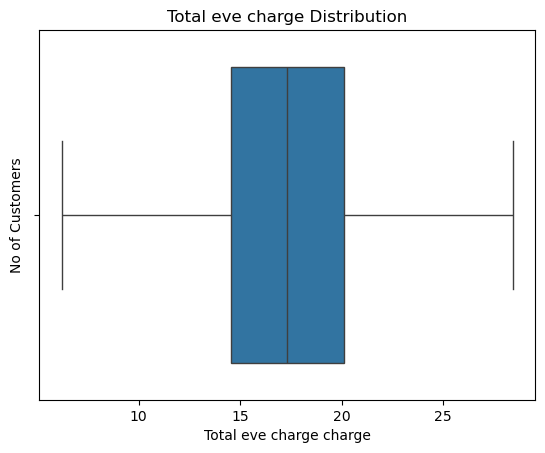

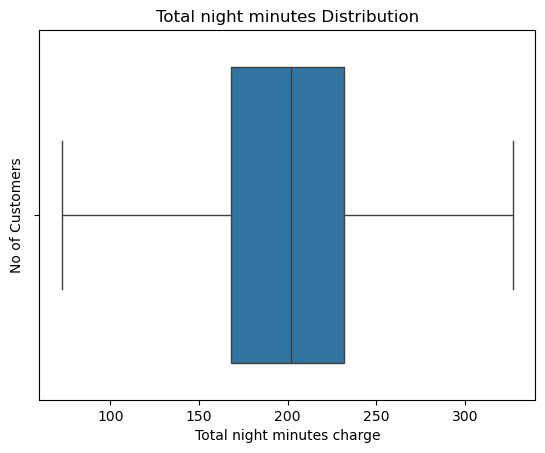

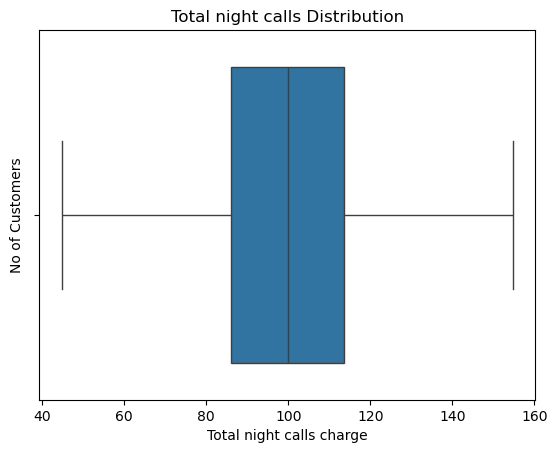

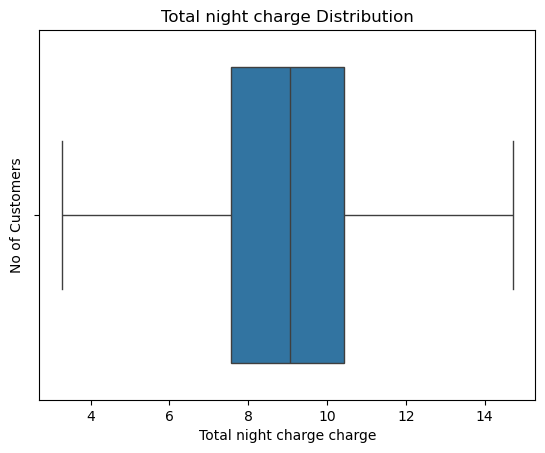

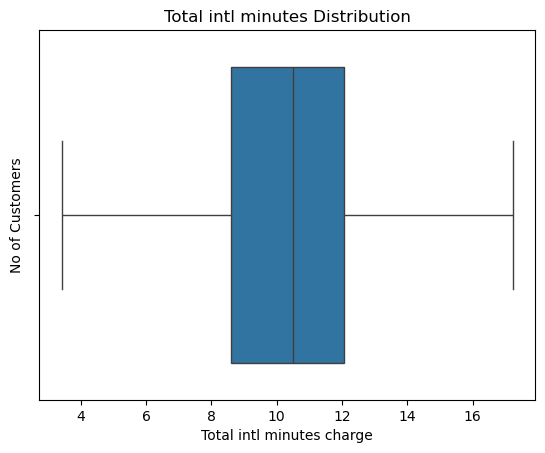

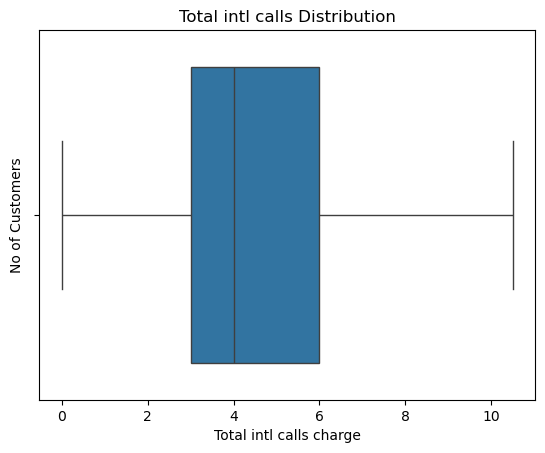

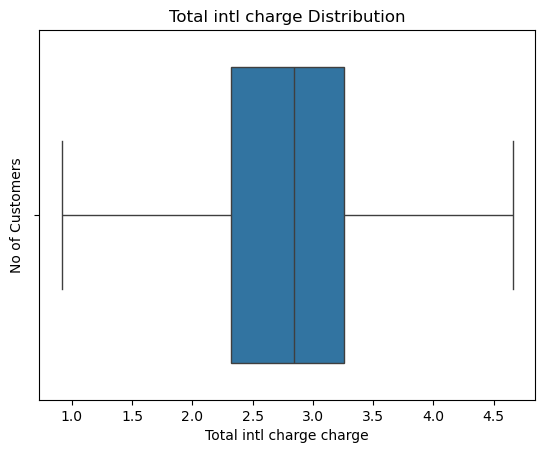

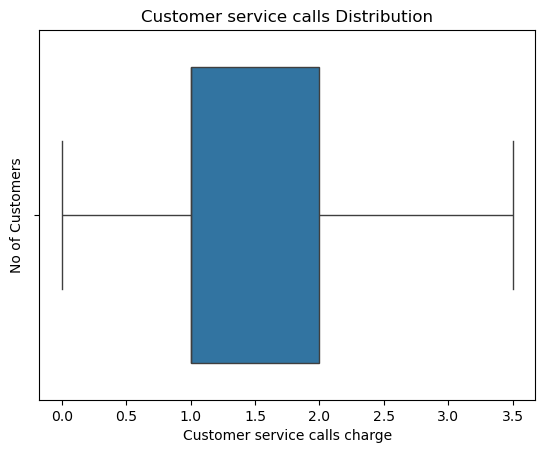

In [13]:
for i in num:
    ax = sns.boxplot(data = Tel_data,x = i)
    ax.set(title='{} Distribution'.format(i), xlabel='{} charge'.format(i), ylabel='No of Customers')
    plt.show()

In [14]:
Tel_data.drop('State',axis=1,inplace = True)

In [15]:
Tel_data.replace(to_replace = ['No','Yes'],value = [0,1], inplace = True)

In [16]:
Tel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          667 non-null    float64
 1   Area code               667 non-null    float64
 2   International plan      667 non-null    int64  
 3   Voice mail plan         667 non-null    int64  
 4   Number vmail messages   667 non-null    float64
 5   Total day minutes       667 non-null    float64
 6   Total day calls         667 non-null    float64
 7   Total day charge        667 non-null    float64
 8   Total eve minutes       667 non-null    float64
 9   Total eve calls         667 non-null    float64
 10  Total eve charge        667 non-null    float64
 11  Total night minutes     667 non-null    float64
 12  Total night calls       667 non-null    float64
 13  Total night charge      667 non-null    float64
 14  Total intl minutes      667 non-null    fl

In [17]:
Tel_data['Churn']

0      False
1       True
2       True
3      False
4      False
       ...  
662    False
663    False
664    False
665    False
666    False
Name: Churn, Length: 667, dtype: bool

In [18]:
Tel_data.replace(to_replace = [False,True],value = [0,1], inplace = True)

### Logistic Regression

In [20]:
X = Tel_data.drop('Churn',axis = 1)
y = Tel_data[['Churn']]

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

In [23]:
X_train.shape

(500, 18)

In [24]:
X_test.shape

(167, 18)

In [25]:
from sklearn.linear_model import LogisticRegression

In [95]:
LR = LogisticRegression()

In [27]:
LR.fit(X_train,y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
y_train_predict = LR.predict(X_train)

In [29]:
model_score = LR.score(X_train, y_train)

In [30]:
model_score

0.872

In [31]:
model_score = LR.score(X_test, y_test)
model_score

0.8682634730538922

### Model Evaluation

#### Confusion Matrix

In [34]:
from sklearn import metrics

In [35]:
print(metrics.confusion_matrix(y_train, y_train_predict))

[[419   6]
 [ 58  17]]


Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

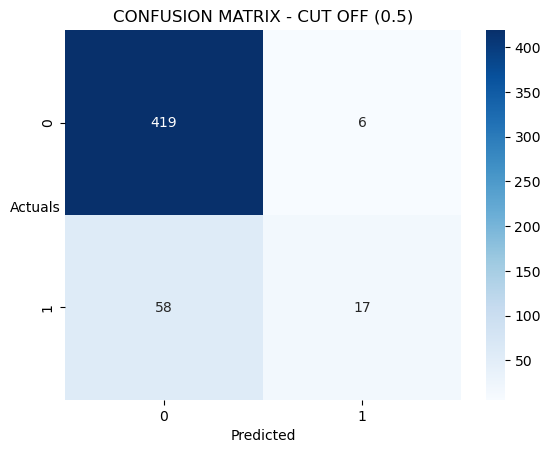

In [36]:
sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

In [37]:
y_test_predict = LR.predict(X_test)

[[139   8]
 [ 14   6]]


Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

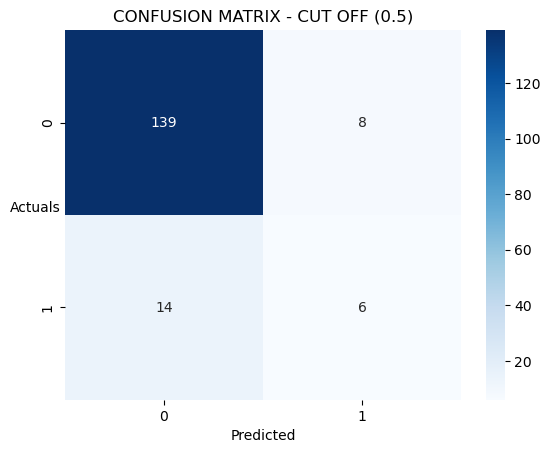

In [38]:
print(metrics.confusion_matrix(y_test, y_test_predict))
sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

#### Classification Report

In [40]:
print(metrics.classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       425
           1       0.74      0.23      0.35        75

    accuracy                           0.87       500
   macro avg       0.81      0.61      0.64       500
weighted avg       0.86      0.87      0.84       500



In [41]:
print(metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       147
           1       0.43      0.30      0.35        20

    accuracy                           0.87       167
   macro avg       0.67      0.62      0.64       167
weighted avg       0.85      0.87      0.86       167



#### AUC - ROC

AUC: 0.786


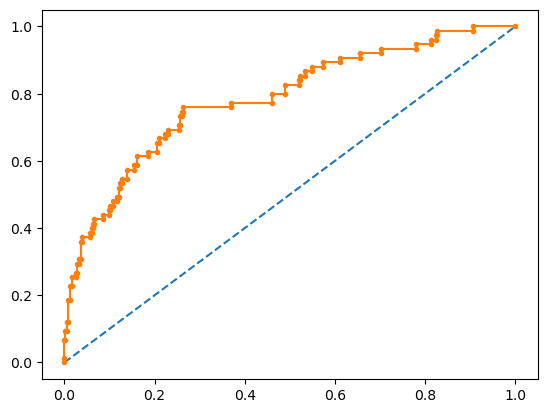

In [90]:
probs = LR.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.775


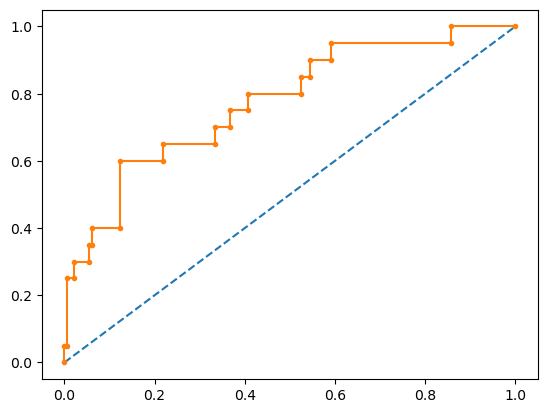

In [86]:
probs = LR.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Model Regularization

In [97]:
LR_cv = LogisticRegression(solver = 'liblinear')

In [111]:
param_grid = {
   'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'penalty': ['l1', 'l2', 'elasticnet', None],     
    'C': [0.01, 0.1, 1, 10, 100],
    'class_weight': [None, 'balanced'] 
}

In [113]:
from sklearn.model_selection import GridSearchCV

In [115]:
grid_search = GridSearchCV(estimator=LR_cv, param_grid=param_grid,
                           scoring='f1', cv=5, verbose=1, n_jobs=-1)

In [117]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver =

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2', 'elasticnet', None]},
             scoring='f1', verbose=1)

In [119]:
print("Best Parameters found: ", grid_search.best_params_)
print("Best F1 Score: ", grid_search.best_score_)

Best Parameters found:  {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2'}
Best F1 Score:  0.4401607154489703


In [123]:
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train)

Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

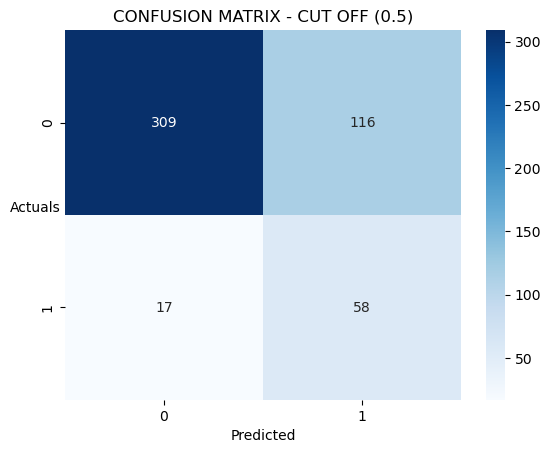

In [129]:
sns.heatmap((metrics.confusion_matrix(y_train, y_pred_train)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

In [131]:
print(metrics.classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.95      0.73      0.82       425
           1       0.33      0.77      0.47        75

    accuracy                           0.73       500
   macro avg       0.64      0.75      0.64       500
weighted avg       0.86      0.73      0.77       500



In [133]:
y_pred_test = best_model.predict(X_test)

Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

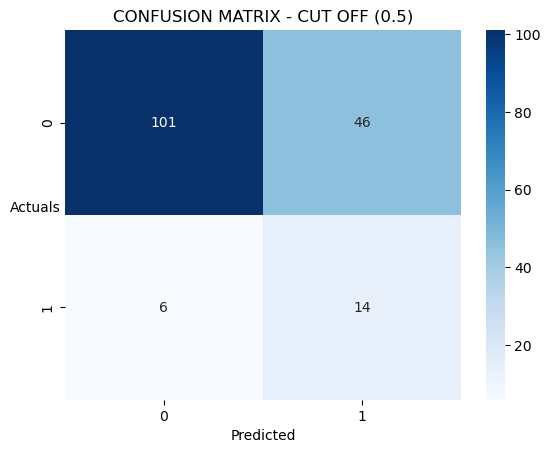

In [137]:
sns.heatmap((metrics.confusion_matrix(y_test, y_pred_test)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

In [135]:
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.69      0.80       147
           1       0.23      0.70      0.35        20

    accuracy                           0.69       167
   macro avg       0.59      0.69      0.57       167
weighted avg       0.86      0.69      0.74       167



### How to Handle Imbalanced Data

##### OverSampling

In [150]:
from imblearn.over_sampling import SMOTE,ADASYN

In [152]:
smote = SMOTE()

In [154]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [156]:
X_train.shape

(500, 18)

In [158]:
X_train_resampled.shape

(850, 18)

In [160]:
LR_cv.fit(X_train_resampled,y_train_resampled)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(solver='liblinear')

In [188]:
best_model.fit(X_train_resampled,y_train_resampled)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.1, class_weight='balanced', solver='liblinear')

In [180]:
Y_pred_train_res = LR_cv.predict(X_train_resampled)
Y_pred_test = LR_cv.predict(X_test)

Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

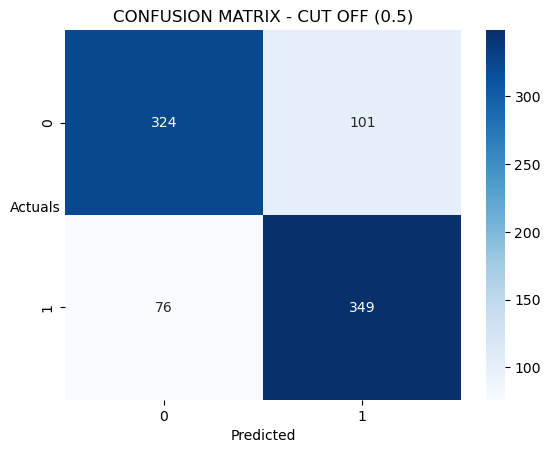

In [178]:
sns.heatmap((metrics.confusion_matrix(y_train_resampled, Y_pred_train_res)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')


Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

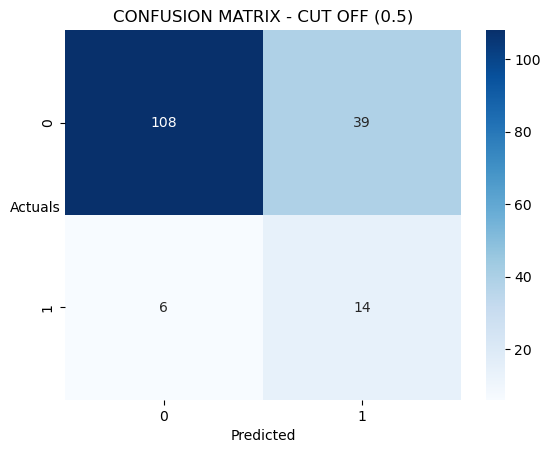

In [182]:
sns.heatmap((metrics.confusion_matrix(y_test, Y_pred_test)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

In [184]:
print(metrics.classification_report(y_train_resampled, Y_pred_train_res))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79       425
           1       0.78      0.82      0.80       425

    accuracy                           0.79       850
   macro avg       0.79      0.79      0.79       850
weighted avg       0.79      0.79      0.79       850



In [186]:
print(metrics.classification_report(y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.73      0.83       147
           1       0.26      0.70      0.38        20

    accuracy                           0.73       167
   macro avg       0.61      0.72      0.61       167
weighted avg       0.87      0.73      0.77       167



#### SMOTE on best model using grid search

In [191]:
Y_pred_train_res = best_model.predict(X_train_resampled)
Y_pred_test = best_model.predict(X_test)

Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

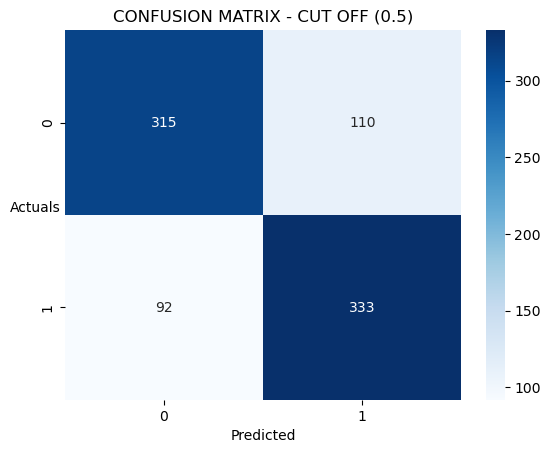

In [193]:
sns.heatmap((metrics.confusion_matrix(y_train_resampled, Y_pred_train_res)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')


Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

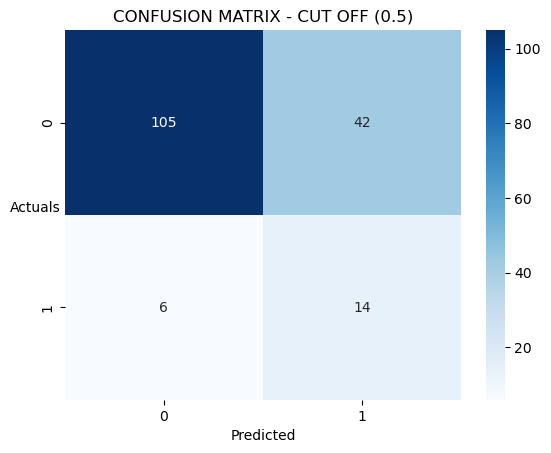

In [195]:
sns.heatmap((metrics.confusion_matrix(y_test, Y_pred_test)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

In [197]:
print(metrics.classification_report(y_train_resampled, Y_pred_train_res))

              precision    recall  f1-score   support

           0       0.77      0.74      0.76       425
           1       0.75      0.78      0.77       425

    accuracy                           0.76       850
   macro avg       0.76      0.76      0.76       850
weighted avg       0.76      0.76      0.76       850



In [199]:
print(metrics.classification_report(y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.71      0.81       147
           1       0.25      0.70      0.37        20

    accuracy                           0.71       167
   macro avg       0.60      0.71      0.59       167
weighted avg       0.86      0.71      0.76       167



##### Undersampling

In [204]:
from imblearn.under_sampling import RandomUnderSampler

In [208]:
undersampler = RandomUnderSampler()

In [210]:
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

In [212]:
Y_pred_train_res = best_model.predict(X_train_resampled)
Y_pred_test = best_model.predict(X_test)

Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

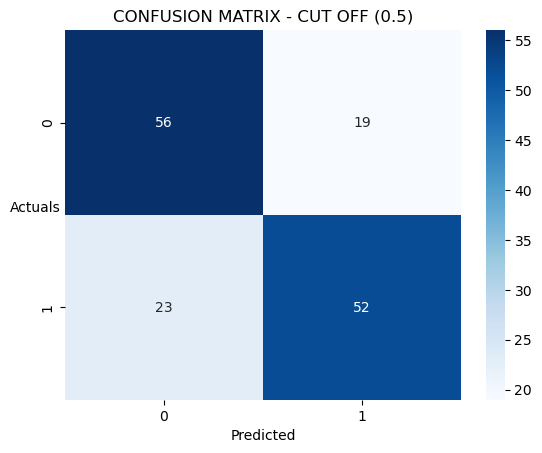

In [214]:
sns.heatmap((metrics.confusion_matrix(y_train_resampled, Y_pred_train_res)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

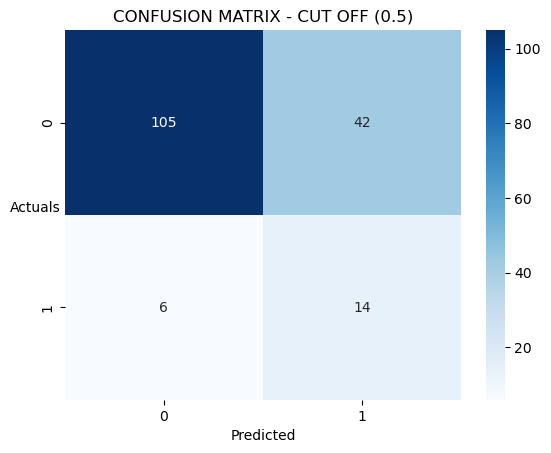

In [215]:
sns.heatmap((metrics.confusion_matrix(y_test, Y_pred_test)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

In [216]:
print(metrics.classification_report(y_train_resampled, Y_pred_train_res))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73        75
           1       0.73      0.69      0.71        75

    accuracy                           0.72       150
   macro avg       0.72      0.72      0.72       150
weighted avg       0.72      0.72      0.72       150



In [220]:
print(metrics.classification_report(y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.71      0.81       147
           1       0.25      0.70      0.37        20

    accuracy                           0.71       167
   macro avg       0.60      0.71      0.59       167
weighted avg       0.86      0.71      0.76       167



AUC: 0.787


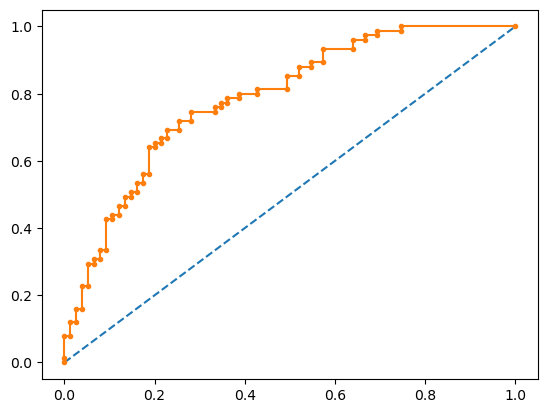

In [223]:
probs = best_model.predict_proba(X_train_resampled)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train_resampled, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_resampled, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.779


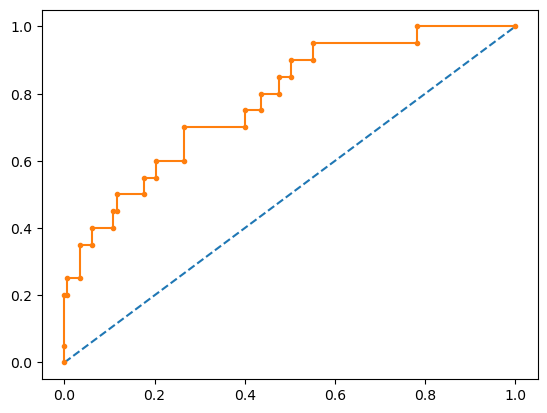

In [225]:
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()